In [88]:
## Name: Nivedita Prasad
# Email: n1prasad@eng.ucsd.edu
# PID: A53099577

## Homework 3

You will have to submit the following two completed ipython notebooks for this homework.

1. PCA_analysis
2. Reconstruction

In [89]:
%pylab inline
data_dir = "./Data/Weather/"
!mkdir -p $data_dir
!ls $data_dir

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


SampleStations.pickle  STAT.pickle


### Downloading Pickled data from S3
If `STAT.pickle` is not in the directory, get it using the following command

In [63]:
!curl -o $data_dir/STAT.pickle http://mas-dse-open.s3.amazonaws.com/Weather/STAT.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 77.8M  100 77.8M    0     0  6232k      0  0:00:12  0:00:12 --:--:-- 6608k


### Get the statistics from the Pickle File

In [90]:
import pickle
STAT,STAT_description=pickle.load(open(data_dir+'/STAT.pickle','r'))

In [91]:
STAT.keys()

['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']

In [92]:
(STAT_description)

[('SortedVals',
  'Sample of values',
  'vector whose length varies between measurements'),
 ('UnDef',
  'sample of number of undefs per row',
  'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))]

In [93]:
#np.shape(STAT['TMIN']['std'])
#array = STAT['TMIN']['SortedVals'][100:(len(STAT['TMIN']['SortedVals']))-100]

In [94]:
#STAT['TMIN']['std']
#array = STAT['TMIN']['Var']
#map(lambda x: sqrt(x), array)
#array = STAT['TMIN']['Mean'] - array
#array

In [95]:
Scalars=['mean','std','low1000','low100','high100','high1000']
for meas in STAT.keys():
    !grep $meas './Data/Weather/ghcnd-readme.txt'
    S=STAT[meas]
    for scalar in Scalars:
        print '%s:%f'%(scalar,S[scalar]),
    print

grep: ./Data/Weather/ghcnd-readme.txt: No such file or directory
mean:44.531018 std:109.933072 low1000:-350.000000 low100:-245.000000 high100:239.000000 high1000:278.000000
grep: ./Data/Weather/ghcnd-readme.txt: No such file or directory
mean:113.582223 std:119.255224 low1000:-267.000000 low100:-167.000000 high100:339.000000 high1000:389.000000
grep: ./Data/Weather/ghcnd-readme.txt: No such file or directory
mean:175.823101 std:123.742076 low1000:-233.000000 low100:-122.000000 high100:383.000000 high1000:433.000000
grep: ./Data/Weather/ghcnd-readme.txt: No such file or directory
mean:2.126900 std:24.160393 low1000:0.000000 low100:0.000000 high100:76.000000 high1000:254.000000
grep: ./Data/Weather/ghcnd-readme.txt: No such file or directory
mean:21.454498 std:123.727039 low1000:0.000000 low100:0.000000 high100:508.000000 high1000:1676.000000
grep: ./Data/Weather/ghcnd-readme.txt: No such file or directory
mean:24.277398 std:100.174134 low1000:0.000000 low100:0.000000 high100:356.000000 

### Script for plotting yearly plots 

In [96]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7), c=None):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    if c is not None:
        plot_date(yearday,T, '-',color=c);
    else:
        plot_date(yearday,T, '-', );
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

### Plot the following 3 plots for each measurement:

1. A histogram from the sample values (from SortedVals) restricted between low100 and high100 (By which we mean that any value larger or equal to low100 and smaller or equal to high100 is included).
2. Plot of mean and mean $\pm$ std
3. Number of measurements recorded each day

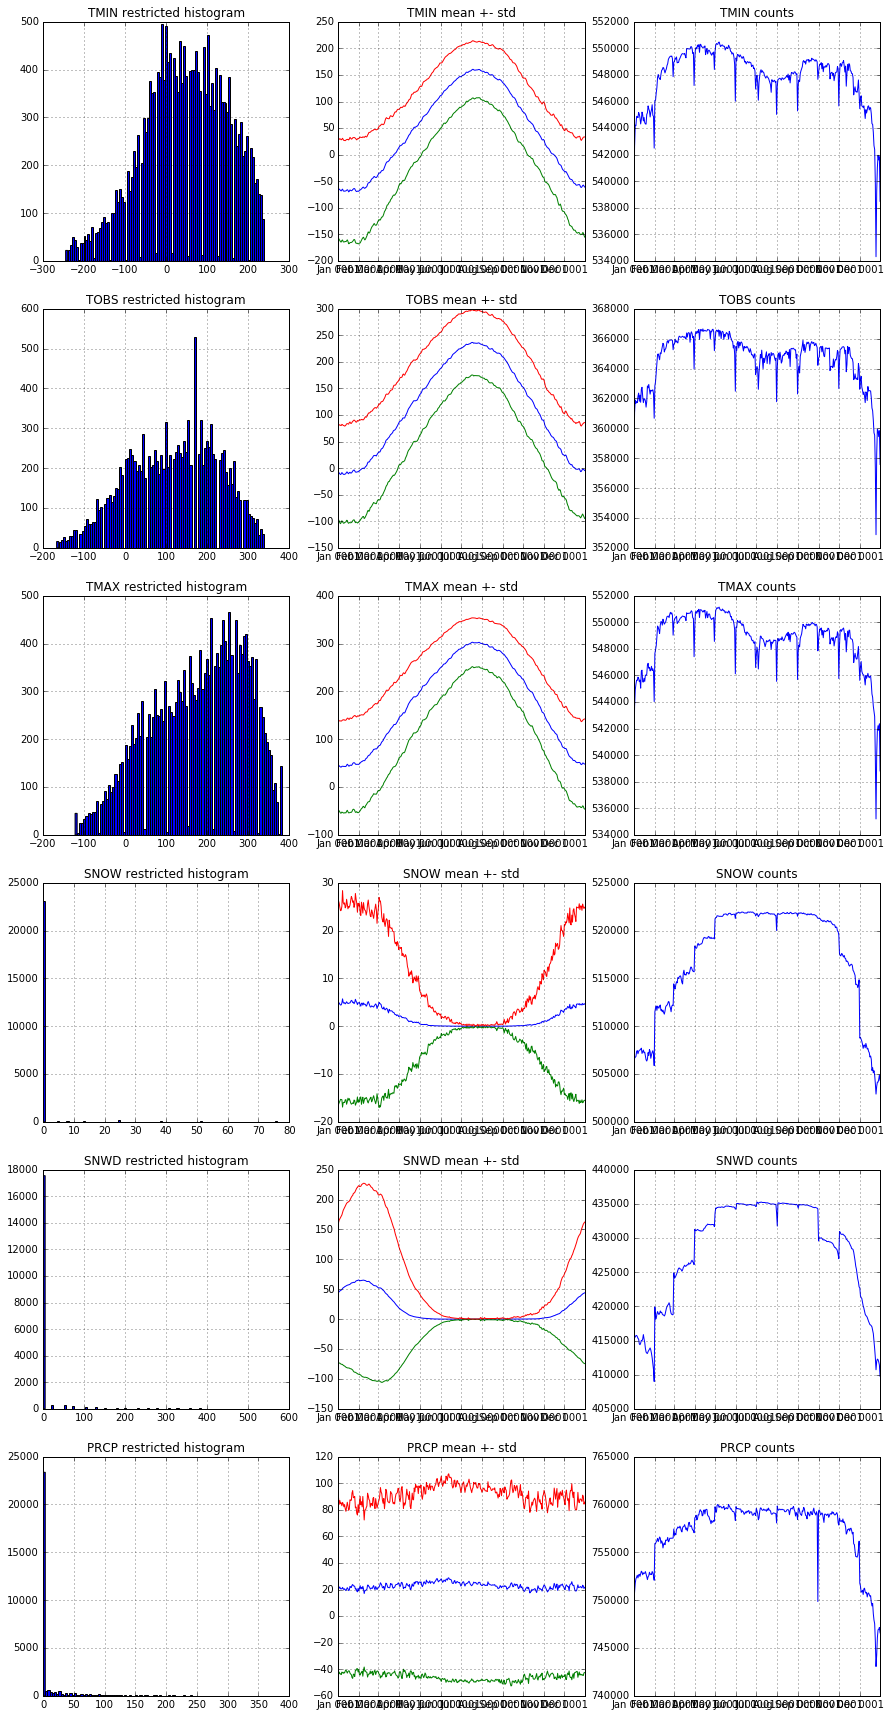

In [97]:
import pylab as P
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    
    
    ## Your code for Histogram    
    #x = STAT[meas]['SortedVals'][100:(len(STAT[meas]['SortedVals']))-100+1]
    x = filter(lambda y : y <= STAT[meas]['high100'] and y >= STAT[meas]['low100'], STAT[meas]['SortedVals'])
    # the histogram of the data with histtype='step'
    #hist = np.histogram(x,bins=100)
    P.hist(x,bins=100)
    #n, bins, patches = P.hist(x, 100, normed=1, histtype='bar', color='blue')
    #P.setp(patches, 'facecolor', 'b', 'alpha', 1)
    
    grid()
    ttl = meas + ' ' + 'restricted histogram'
    title(ttl)
    
    
    subplot(6,3,offset)
    offset+=1
    grid()
    
    ## Your code for mean and mean +- std
    array = STAT[meas]['Var']
    YearlyPlots(STAT[meas]['Mean'])
    array = map(lambda x: sqrt(x), array)
    array1 = STAT[meas]['Mean'] - array
    array2 = STAT[meas]['Mean'] + array
    YearlyPlots(array1)
    YearlyPlots(array2)
    grid()
    ttl = meas + ' ' + 'mean +- std'
    title(ttl)
    #print(np.shape(STAT[meas]['Mean']))
    subplot(6,3,offset)
    offset+=1
    grid()
  
    ## Your code for number of measurements
    YearlyPlots(STAT[meas]['NE'])
    grid()
    ttl = meas + ' ' + 'counts'
    title(ttl)

### Plot the Number of measurements recorded each day for TMAX

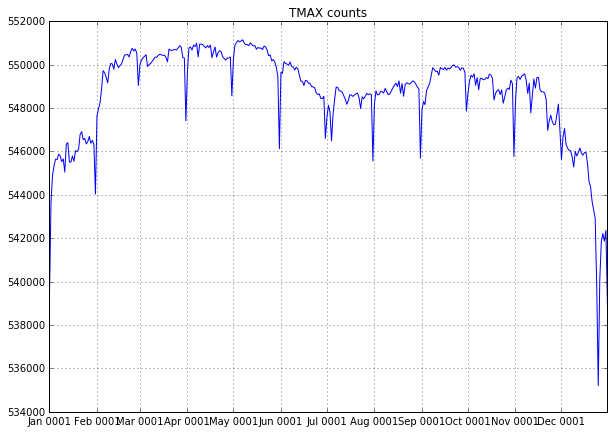

In [98]:
## Your code here
YearlyPlots(STAT['TMAX']['NE'],ttl = 'TMAX counts')

### Extra Credit
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

* Can you Explain the counts per day for "SNWD" ?

Provide your explanation in new markdown cells appended after this cell. Support your explanation
using code cells and graphs. If you need more data that is available only in the full dataset in the cloud but not in the data you have downloaded, contact your TA.


The lower count at the beginning and end of the year and sudden dip at the month end is due to the lower count of a subset of stations. 
To find this subset, first the average count per day for each station is calculated and the average of the counts during the first two days and last 3 days of the month is calculated. If the difference between these two averages are high, it is an indication that the station has lower counts during the beginning and end of the year and end of the month. Such stations can be filtered out. 

In [115]:
!curl -o $data_dir/tmax_all_years.pickle http://mas-dse-open.s3.amazonaws.com/Weather/tmax_all_years.pickle
!curl -o $data_dir/tmax_all_stations.pickle http://mas-dse-open.s3.amazonaws.com/Weather/tmax_all_stations.pickle 
!curl -o $data_dir/snwd_all_years.pickle http://mas-dse-open.s3.amazonaws.com/Weather/snwd_all_years.pickle
!curl -o $data_dir/snwd_all_stations.pickle http://mas-dse-open.s3.amazonaws.com/Weather/snwd_all_stations.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1926k  100 1926k    0     0  1480k      0  0:00:01  0:00:01 --:--:-- 1485k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  216M  100  216M    0     0  6274k      0  0:00:35  0:00:35 --:--:-- 7223k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1625k  100 1625k    0     0  1392k      0  0:00:01  0:00:01 --:--:-- 1625k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  385M  100  385M    0     0  6317k      0  0:01:02  0:01:02 --:--:-- 5580k


In [116]:
import pickle
#data_tmax_all_year=pickle.load(open('./Data/Weather/tmax_all_years.pickle','r'))
data_tmax_all_stations=pickle.load(open('./Data/Weather/tmax_all_stations.pickle','r'))
data_tmax_all_years=pickle.load(open('./Data/Weather/tmax_all_years.pickle','r'))
snwd_tmax_all_year=pickle.load(open('./Data/Weather/snwd_all_years.pickle','r'))
snwd_tmax_all_stations=pickle.load(open('./Data/Weather/snwd_all_stations.pickle','r'))
#Data=pickle.load(open('../Data/Weather/SampleStations.pickle','r'))','r'))

In [117]:
last_days = [0,1,28,29,30,31,32,56,57,58,59,60,87,88,89,90,91,117,118,119,120,121,148,149,150,151,152,178,179,180,
             181,182,209,210,211,212,213,240,241,242,243,244,270,271,272,273,301,302,303,304,305,331,332,333,334,
             335,363,364]

In [118]:
x = []
y = []
l = len(last_days)
for (station,data) in data_tmax_all_stations:
    
    mean = data.mean()
    x = append(x,mean)
    s = 0
    avg = 0
    for i in last_days:
        s = s+data[i]
        avg = s/l
    y = append(y,avg)

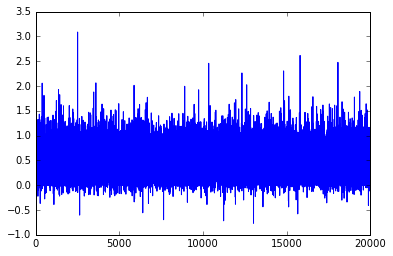

In [119]:
# x is the mean count per day for each station
# y is the mean of the counts of last 3 days of a month and first 2 days of the month
# z is the difference between the two means for each station. Higher positive difference suggests that the counts 
# towrads the end of the month is low
z = x-y
a = arange(0,len(data_tmax_all_stations))
plot(a,z)

In [120]:
#filtering out station based on this
zipped_data = zip(data_tmax_all_stations,z)
#filtered stations are the stations that reduces the sudden dip at the end of the month 
filtered_stations = filter(lambda (x,y): y < 0.5 , zipped_data)

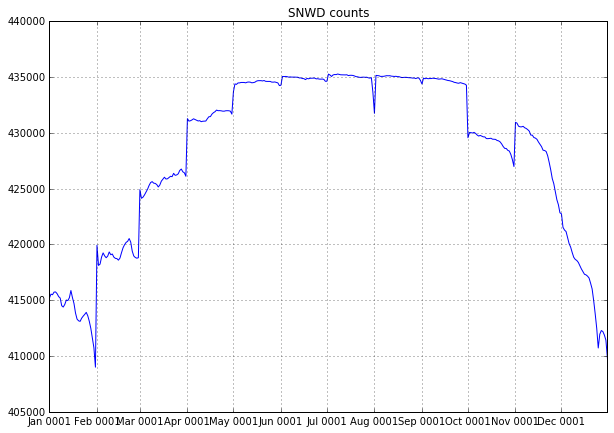

In [121]:
YearlyPlots(STAT['SNWD']['NE'],ttl = 'SNWD counts')

### Plot the following 3 plots for each measurement:

1. The percentage of variance explained by top-k eigen vectors for k between 1 to 9
2. Plot of mean and mean $\pm$ std
3. Plot of top 3 eigenvectors

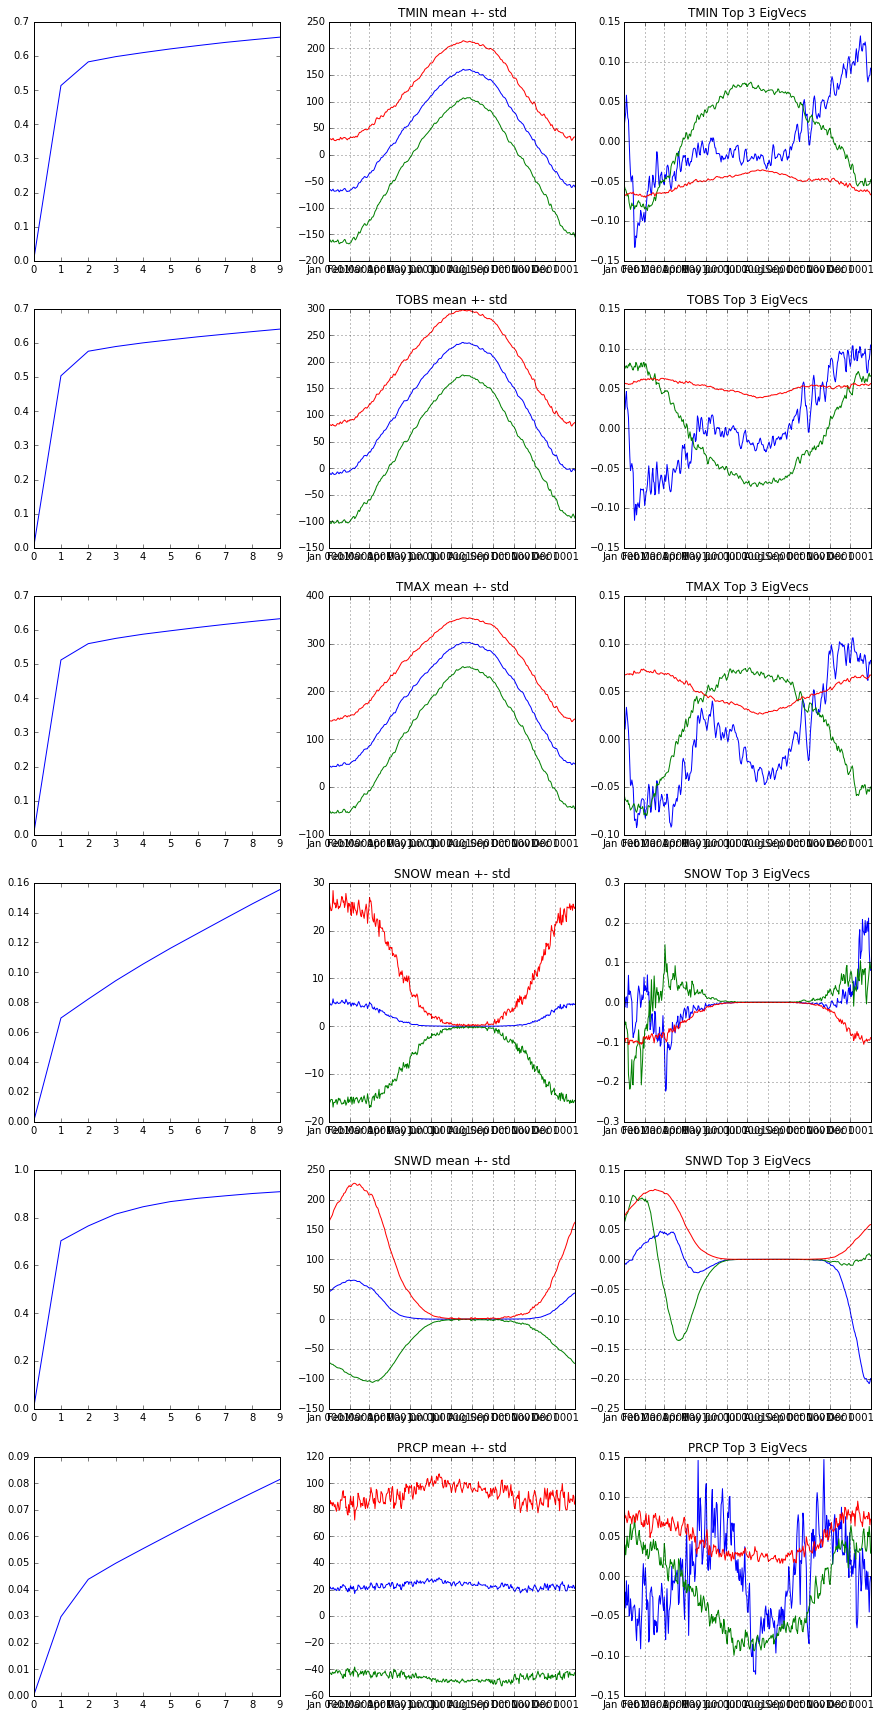

In [122]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    #subplot(6,3,offset)
    #offset+=1
    y = arange(0,10)
    x = []
    sum_total = sum(STAT[meas]['eigval'])
    for i in y:
        eig_val = STAT[meas]['eigval'][0:i]
        sum_val = sum(eig_val)
        fraction = sum_val/sum_total
        x = append(x,fraction)
    
    subplot(6,3,offset)
    offset+=1
    
    P.plot(y,x)  
    ## Your code for percentage of variance explained
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    array = STAT[meas]['Var']
    YearlyPlots(STAT[meas]['Mean'])
    array = map(lambda x: sqrt(x), array)
    array1 = STAT[meas]['Mean'] - array
    array2 = STAT[meas]['Mean'] + array
    
    #ttl = meas + ' ' + 'mean +- std'
    YearlyPlots(array1)
    YearlyPlots(array2)
    name =  meas + ' ' + 'mean +- std'
    title(name)
    
    subplot(6,3,offset)
    offset+=1
    ## Your code for top-3 eigenvectors
    eigen_value_vector = zip(STAT[meas]['eigval'],transpose(STAT[meas]['eigvec']))
    array = sorted(eigen_value_vector,key=lambda x : x[0],reverse = True)[0:3]
    YearlyPlots(array[2][1])
    YearlyPlots(array[1][1])
    #ttl = meas + ' ' + 'Top 3 EigVecs'
    YearlyPlots(array[0][1])
    
    #ttl = meas + ' ' + ''
    name = meas + ' ' + 'Top 3 EigVecs'
    title(name)

In [ ]:
"""
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for percentage of variance explained
    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    subplot(6,3,offset)
    offset+=1
    ## Your code for top-3 eigenvectors
"""